<a href="https://colab.research.google.com/github/Ankita01K/yolo11/blob/main/yolo11_on_custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Oct 15 06:41:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 42.3 MB/s eta 0:00:00


import all the required libraries

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Images

download the dataset from roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mLCeALOPM5ZaFsUSORI3")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-1 in yolov11:: 100%|██████████| 6560/6560 [00:01<00:00, 5566.73it/s]


In [ ]:
!pwd

/content


In [ ]:
dataset.location

'/content/PPE_Detection-1'

train yolo11 model on custom dataset

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model='yolo11n.pt' epochs=100 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 291MB/s]
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/PPE_Detection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

Validate Fine-Tuned Model

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/PPE_Detection-1/valid/labels.cache... 649 images, 0 backgrounds, 0 corrupt: 100% 649/649 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 41/41 [00:09<00:00,  4.44it/s]
                   all        649       3126      0.925      0.868      0.905      0.645
             Dust Mask        301        311      0.969       0.92       0.96       0.68
              Eye Wear        148        149      0.914      0.758      0.826      0.481
                 Glove        354        644      0.958      0.888      0.944      0.684
                Jacket        364        607      0.889      0.885      0.939      0.732
      Protective Boots        299        610      0.966      0.967      0.983      0.702
     Protective Helmet        413        780  

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt"  conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/325 /content/PPE_Detection-1/test/images/000446_jpg.rf.5ea7ca6bde68eb546e8c3dcd1c0fd6d5.jpg: 640x640 1 Glove, 2 Protective Helmets, 11.2ms
image 2/325 /content/PPE_Detection-1/test/images/20220721_161946_jpg.rf.4ff1543edb0405f57fb590d5dcb284b6.jpg: 640x640 (no detections), 9.3ms
image 3/325 /content/PPE_Detection-1/test/images/20220721_162015_jpg.rf.ee54ba7d79baa065a7cfc4666f0fd024.jpg: 640x640 1 Dust Mask, 8.3ms
image 4/325 /content/PPE_Detection-1/test/images/20220721_162036_jpg.rf.9d32aa23505a54eff5555d9b667bb597.jpg: 640x640 1 Dust Mask, 7.8ms
image 5/325 /content/PPE_Detection-1/test/images/20220721_162308_jpg.rf.2f8d1ad4716998b9fc123d94dce4d8b0.jpg: 640x640 1 Dust Mask, 2 Eye Wears, 7.8ms
image 6/325 /content/PPE_Detection-1/test/images/20220721_162435_jpg.rf.f36f898409158c65a23c0604535ff366.jpg: 640x640 1 Ey

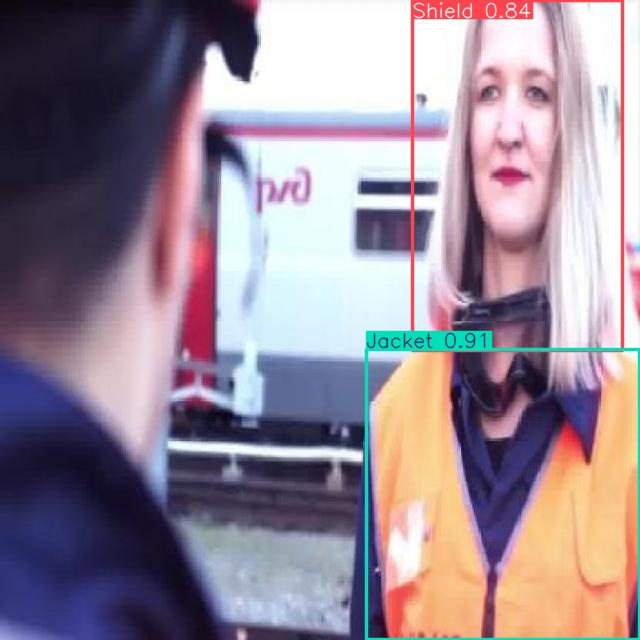

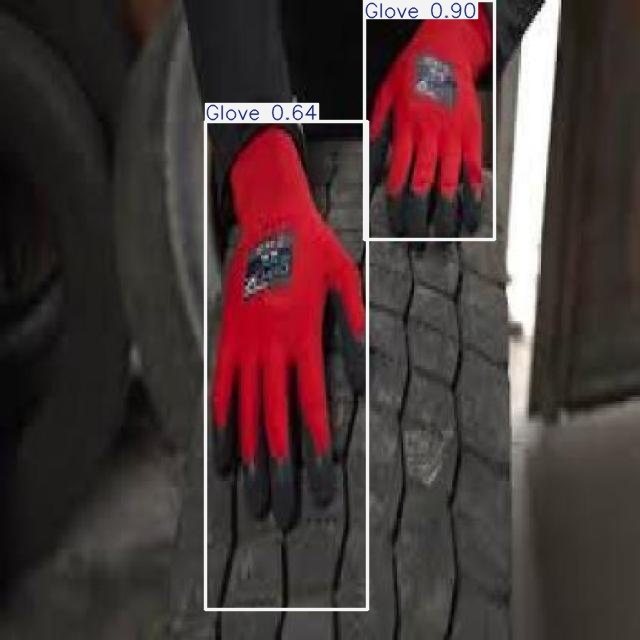

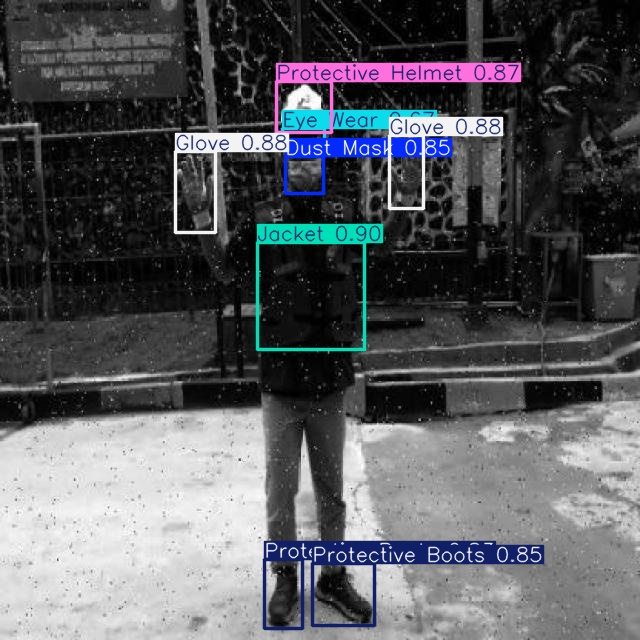

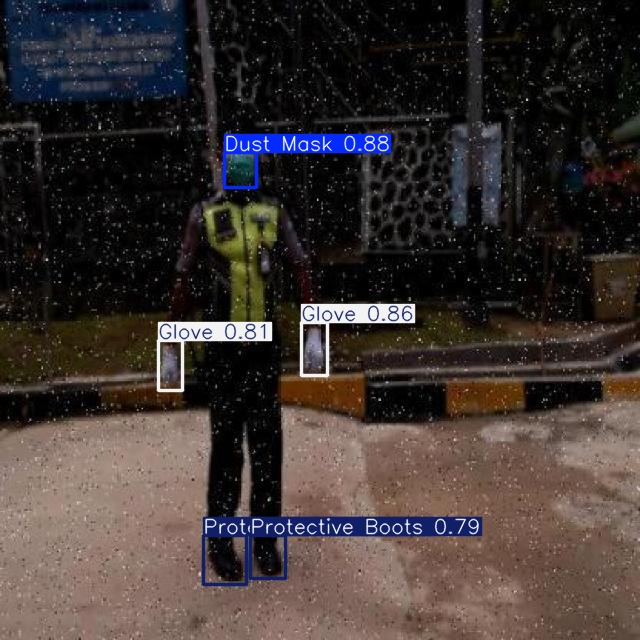

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage ,display

latest_folder=max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for image in glob.glob(f'{latest_folder}/*.jpg')[1:5]:
  display(IPyImage(filename=image ,width=600))
  print("\n")

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt"  conf=0.25 source=/content/img.webp save=True

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/img.webp: 352x640 5 Jackets, 2 Protective Helmets, 58.4ms
Speed: 3.5ms preprocess, 58.4ms inference, 526.6ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


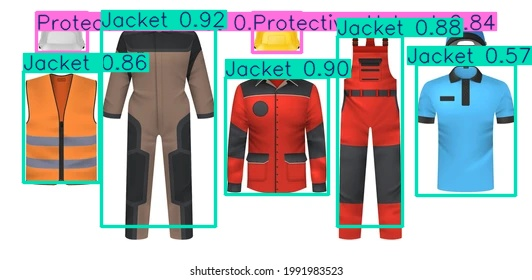

In [ ]:
from IPython.display import Image

Image('/content/runs/detect/predict2/img.jpg',width=300)

Instance segementation

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mLCeALOPM5ZaFsUSORI3")
project = rf.workspace("iotseecs").project("brain-tumor-yzzav")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BRAIN-TUMOR-1 in yolov11:: 100%|██████████| 1680/1680 [00:00<00:00, 3318.08it/s]


In [ ]:
# load the model
from ultralytics import YOLO
model=YOLO('yolo11n-seg.pt')

# train the model
train_results=model.train(
    data='/content/BRAIN-TUMOR-1/data.yaml',
    epochs=10,
    imgsz=640,
    device=0,
)

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/BRAIN-TUMOR-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning /content/BRAIN-TUMOR-1/train/labels... 583 images, 2 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:00<00:00, 1630.50it/s]

train: New cache created: /content/BRAIN-TUMOR-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/BRAIN-TUMOR-1/valid/labels... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 727.01it/s]

val: New cache created: /content/BRAIN-TUMOR-1/valid/labels.cache


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.81G      1.142      2.504       3.06      1.347          7        640: 100%|██████████| 37/37 [00:18<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        123        126          1     0.0863      0.821      0.542          1     0.0863      0.786      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.34G      1.104      1.854      2.006      1.246          7        640: 100%|██████████| 37/37 [00:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        123        126      0.904      0.674      0.856       0.59      0.904      0.672      0.834      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.34G      1.147      1.853      1.765      1.273          7        640: 100%|██████████| 37/37 [00:13<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        123        126      0.671      0.722      0.762      0.457      0.709      0.714      0.777       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.34G      1.116      1.763      1.495      1.251          7        640: 100%|██████████| 37/37 [00:12<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        123        126      0.789      0.857      0.879      0.588      0.783      0.849      0.878      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.34G      1.063      1.737      1.312      1.207          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        126      0.878      0.817      0.922      0.644      0.865      0.802      0.853      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.34G      1.009      1.618      1.132      1.152          8        640: 100%|██████████| 37/37 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        123        126      0.879      0.897      0.948      0.668      0.874      0.921      0.947       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.34G      1.035      1.528      1.025      1.181          8        640: 100%|██████████| 37/37 [00:16<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        123        126      0.926      0.921      0.966       0.71      0.933      0.913      0.948      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.34G     0.9216       1.46      0.902      1.122          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        123        126      0.939      0.976      0.987      0.744      0.939      0.976      0.987      0.732



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.34G     0.8536      1.375      0.798       1.07          8        640: 100%|██████████| 37/37 [00:12<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        123        126      0.969      0.984      0.988      0.762      0.969      0.984      0.988      0.753



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.34G     0.8216      1.305     0.7458      1.064          7        640: 100%|██████████| 37/37 [00:13<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        123        126      0.991      0.992      0.988      0.757      0.991      0.992      0.988      0.752



10 epochs completed in 0.058 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 6.0MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.68s/it]


                   all        123        126      0.969      0.984      0.987      0.763      0.969      0.984      0.987      0.753
Speed: 0.5ms preprocess, 4.5ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to runs/segment/train3


In [ ]:
from IPython.display import Image


image 1/1 /content/tumor.jpg: 640x576 1 tumor, 55.5ms
Speed: 4.2ms preprocess, 55.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs/segment/predict2


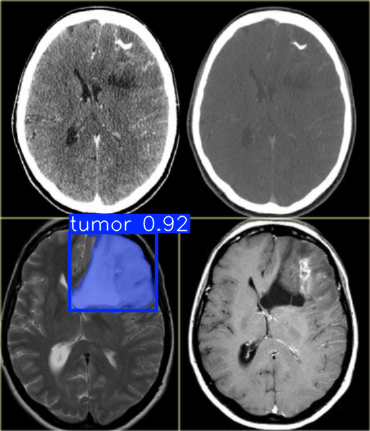

In [ ]:
model=YOLO('/content/runs/segment/train3/weights/best.pt')
results=model('/content/tumor.jpg',save=True)
results[0].show()


image 1/1 /content/demo2.jpg: 640x640 1 tumor, 18.3ms
Speed: 2.4ms preprocess, 18.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


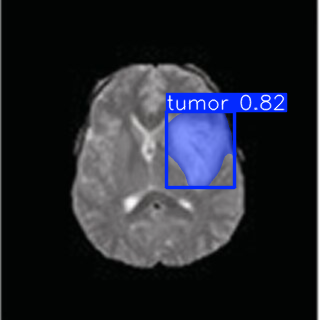

In [ ]:
model=YOLO('/content/runs/segment/train3/weights/best.pt')
results=model('/content/demo2.jpg',save=True)
results[0].show()

image classifications

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mLCeALOPM5ZaFsUSORI3")
project = rf.workspace("rmit-yfxuo").project("emotion-wh4tw")
version = project.version(1)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to emotion-1 in folder:: 100%|██████████| 2271/2271 [00:00<00:00, 5877.33it/s]


In [ ]:
from ultralytics import YOLO

# loading classification model
model=YOLO('yolo11n-cls.pt')

#train the model
results=model.train(data='/content/emotion-1',epochs=20,imgsz=640)

100%|██████████| 5.52M/5.52M [00:00<00:00, 286MB/s]

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/emotion-1, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

YOLO11n-cls summary: 151 layers, 1,540,071 parameters, 1,540,071 gradients, 3.3 GFLOPs
Transferred 234/236 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/classify/train', view at http://localhost:6006/
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed ✅


train: Scanning /content/emotion-1/train... 1383 images, 0 corrupt: 100%|██████████| 1383/1383 [00:00<00:00, 4003.67it/s]

train: New cache created: /content/emotion-1/train.cache



val: Scanning /content/emotion-1/test... 870 images, 0 corrupt: 100%|██████████| 870/870 [00:00<00:00, 1656.70it/s]

val: New cache created: /content/emotion-1/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:16<00:00,  1.67it/s]

                   all      0.149      0.807



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:12<00:00,  2.33it/s]

                   all      0.149      0.801



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:15<00:00,  1.86it/s]

                   all      0.141      0.795



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.12it/s]

                   all      0.184      0.901



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all      0.218      0.855



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:12<00:00,  2.24it/s]

                   all      0.236      0.883



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all      0.264       0.91



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:11<00:00,  2.34it/s]

                   all      0.269      0.922



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:15<00:00,  1.76it/s]

                   all      0.308      0.925



      Epoch    GPU_mem       loss  Instances       Size


      10/20      1.73G      1.431          7        640: 100%|██████████| 87/87 [00:53<00:00,  1.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:16<00:00,  1.69it/s]

                   all      0.333      0.924



      Epoch    GPU_mem       loss  Instances       Size


      11/20      1.72G      1.385          7        640: 100%|██████████| 87/87 [00:56<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]

                   all      0.384       0.93



      Epoch    GPU_mem       loss  Instances       Size


      12/20      1.78G      1.294          7        640: 100%|██████████| 87/87 [00:48<00:00,  1.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:14<00:00,  1.89it/s]

                   all      0.375      0.929



      Epoch    GPU_mem       loss  Instances       Size


      13/20      1.73G      1.286          7        640: 100%|██████████| 87/87 [00:50<00:00,  1.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:11<00:00,  2.34it/s]

                   all      0.374      0.932



      Epoch    GPU_mem       loss  Instances       Size


      14/20      1.73G      1.229          7        640: 100%|██████████| 87/87 [00:50<00:00,  1.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]

                   all      0.423      0.933



      Epoch    GPU_mem       loss  Instances       Size


      15/20      1.72G      1.221          7        640: 100%|██████████| 87/87 [00:52<00:00,  1.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.02it/s]

                   all      0.423       0.94



      Epoch    GPU_mem       loss  Instances       Size


      16/20      1.78G      1.191          7        640: 100%|██████████| 87/87 [00:51<00:00,  1.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:11<00:00,  2.42it/s]

                   all      0.409      0.946



      Epoch    GPU_mem       loss  Instances       Size


      17/20      1.73G      1.141          7        640: 100%|██████████| 87/87 [00:48<00:00,  1.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all      0.417      0.952



      Epoch    GPU_mem       loss  Instances       Size


      18/20      1.73G      1.105          7        640: 100%|██████████| 87/87 [00:46<00:00,  1.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]

                   all      0.398      0.949



      Epoch    GPU_mem       loss  Instances       Size


      19/20      1.72G      1.078          7        640: 100%|██████████| 87/87 [00:52<00:00,  1.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:12<00:00,  2.20it/s]

                   all      0.422      0.952



      Epoch    GPU_mem       loss  Instances       Size


      20/20      1.78G      1.066          7        640: 100%|██████████| 87/87 [00:52<00:00,  1.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all       0.42      0.948



20 epochs completed in 0.396 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-cls summary (fused): 112 layers, 1,534,991 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/emotion-1/train... found 1383 images in 7 classes ✅ 
val: None...
test: /content/emotion-1/test... found 870 images in 7 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]


                   all      0.421      0.952
Speed: 0.8ms preprocess, 2.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train



image 1/1 /content/emotion-1/test/fearful/im845_png.rf.e318915897c413c95f0dd71f348793ab.jpg: 640x640 fearful 0.60, neutral 0.29, angry 0.03, surprised 0.03, sad 0.02, 5.2ms
Speed: 13.7ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


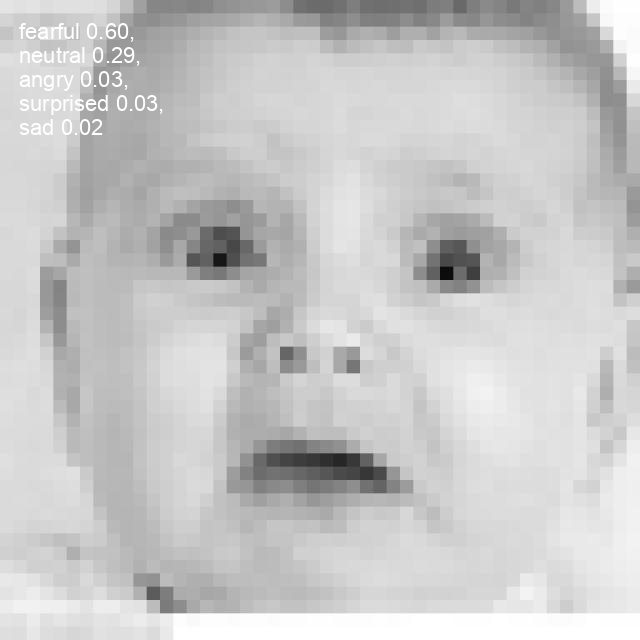

In [ ]:
mpdel=YOLO('/content/runs/classify/train/weights/best.pt')
image=model('/content/emotion-1/test/fearful/im845_png.rf.e318915897c413c95f0dd71f348793ab.jpg')
image[0].show()


image 1/1 /content/emotion-1/train/disgusted/im274_png.rf.66da995d2964d5b034d8e8e552e8fc9b.jpg: 640x640 disgusted 0.90, angry 0.06, fearful 0.03, happy 0.01, sad 0.00, 6.9ms
Speed: 10.2ms preprocess, 6.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/train4


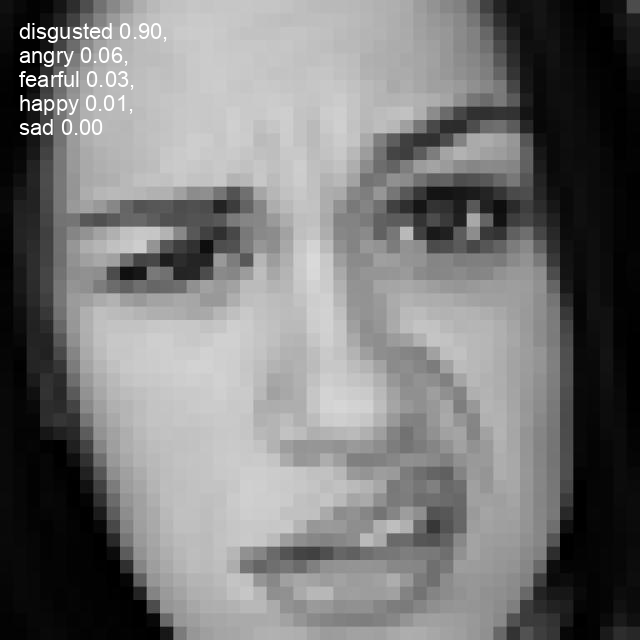

In [32]:
results=model('/content/emotion-1/train/disgusted/im274_png.rf.66da995d2964d5b034d8e8e552e8fc9b.jpg',save=True,conf=0.6)
results[0].show()


image 1/1 /content/happ.jpg: 640x640 neutral 0.30, fearful 0.30, angry 0.16, happy 0.10, disgusted 0.06, 4.9ms
Speed: 20.3ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/train8


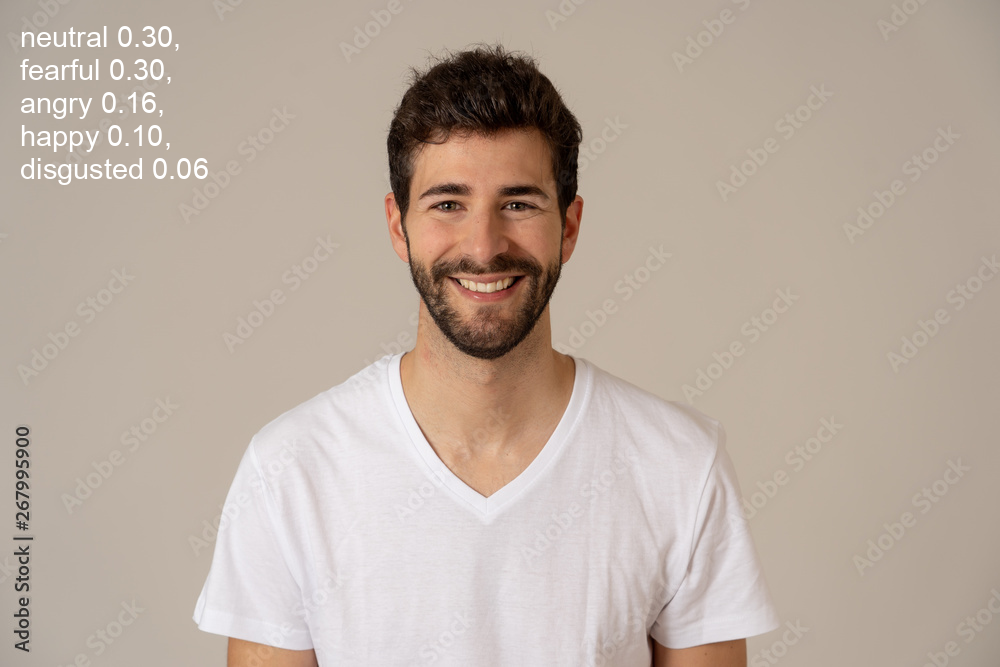

In [36]:
results=model('/content/happ.jpg',save=True)
results[0].show()